In [2]:
import csv, sqlite3
import matplotlib.pyplot as plt

In [12]:
def number_of_nodes():
	result = cur.execute('SELECT COUNT(*) FROM nodes')
	return result.fetchone()[0]

def number_of_ways():
	result = cur.execute('SELECT COUNT(*) FROM ways')
	return result.fetchone()[0]

def number_of_unique_users():
	result = cur.execute('SELECT COUNT(DISTINCT(e.uid)) \
            FROM (SELECT uid FROM nodes UNION ALL SELECT uid FROM ways) e')
	return result.fetchone()[0]
    
def top_contributing_users():
	users = []
	for row in cur.execute('SELECT e.user, COUNT(*) as num \
            FROM (SELECT user FROM nodes UNION ALL SELECT user FROM ways) e \
            GROUP BY e.user \
            ORDER BY num DESC \
            LIMIT 10'):
		users.append(row)
	return users

def myuser_entries():
    result = cur.execute('SELECT (SELECT count(*) \
        FROM nodes \
        WHERE user = "Ruffi") + \
        (SELECT count(*) \
        FROM ways \
        WHERE user = "Ruffi")')
    return result.fetchone()[0]

def myuser_node_keys():
    myuser_node = []
    for row in cur.execute('SELECT nodes_tags.key, COUNT(*) as num \
        FROM nodes, nodes_tags \
        WHERE nodes.user = "Ruffi" \
        AND nodes.id = nodes_tags.id \
        GROUP BY nodes_tags.key \
        ORDER BY num DESC \
        LIMIT 10;'):
        myuser_node.append(row)
    return myuser_node

def myuser_way_keys():
    myuser_way = []
    for row in cur.execute('SELECT ways_tags.key, COUNT(*) as num \
        FROM ways, ways_tags \
        WHERE ways.user = "Ruffi" \
        AND ways.id = ways_tags.id \
        GROUP BY ways_tags.key \
        ORDER BY num DESC \
        LIMIT 10;'):
        myuser_way.append(row)
    return myuser_way


def myuser_highway():
    myuser_highways = []
    for row in cur.execute('SELECT ways_tags.value, COUNT(*) as num \
        FROM ways, ways_tags \
        WHERE ways.user = "Ruffi" \
        AND ways_tags.key="highway" \
        AND ways.id = ways_tags.id \
        GROUP BY ways_tags.value \
        ORDER BY num DESC \
        LIMIT 6;'):
        myuser_highways.append(row)
    return myuser_highways

def common_ammenities():
    ammenities = []
    for row in cur.execute('SELECT value, COUNT(*) as num \
        FROM nodes_tags \
        WHERE key="amenity" \
        GROUP BY value \
        ORDER BY num DESC \
        LIMIT 10;'):
        ammenities.append(row)
    return ammenities

def popular_cuisines():
    cuisines = []
    for row in cur.execute('SELECT nodes_tags.value, COUNT(*) as num \
            FROM nodes_tags \
            JOIN (SELECT DISTINCT(id) FROM nodes_tags WHERE value="restaurant") i \
            ON nodes_tags.id=i.id \
            WHERE nodes_tags.key="cuisine" \
            GROUP BY nodes_tags.value \
            ORDER BY num DESC \
            LIMIT 6'):
            cuisines.append(row)
    return cuisines

def popular_shops():
    shops = []
    for row in cur.execute('SELECT value, COUNT(*) as num \
        FROM nodes_tags \
        WHERE key="shop" \
        GROUP BY value \
        ORDER BY num DESC \
        LIMIT 6;'):
        shops.append(row)
    return shops

def popular_historic():
    historic = []
    for row in cur.execute('SELECT value, COUNT(*) as num \
        FROM nodes_tags \
        WHERE key="historic" \
        GROUP BY value \
        ORDER BY num DESC \
        LIMIT 6;'):
        historic.append(row)
    return historic

def postcode():
    postcodes = []
    for row in cur.execute('SELECT tags.value, COUNT(*) as count \
        FROM (SELECT * FROM nodes_tags UNION ALL SELECT * FROM ways_tags) tags \
        WHERE tags.key="postcode" \
        GROUP BY tags.value \
        ORDER BY count DESC \
        LIMIT 10;'):
        postcodes.append(row)
    return postcodes

def openhour2():
    openhours = []
    for row in cur.execute('SELECT nodes_tags.value, COUNT(*) as num \
            FROM nodes_tags \
            JOIN (SELECT DISTINCT(id) FROM nodes_tags WHERE value="restaurant") i \
            ON nodes_tags.id=i.id \
            WHERE nodes_tags.key="opening_hours" \
            GROUP BY nodes_tags.value \
            ORDER BY num DESC \
            LIMIT 6'):
        openhours.append(row)
    return openhours

def openhour3():
    openhours = []
    for row in cur.execute('SELECT nodes_tags.id, nodes_tags.value \
            FROM nodes_tags \
            JOIN (SELECT DISTINCT(id) FROM nodes_tags WHERE value="restaurant") i \
            ON nodes_tags.id=i.id \
            WHERE nodes_tags.key="opening_hours" \
            GROUP BY nodes_tags.id \
            LIMIT 6'):
        openhours.append(row)
    return openhours

def openhour_yes():
    result = cur.execute('SELECT COUNT(*) \
            FROM nodes_tags \
            JOIN (SELECT DISTINCT(id) FROM nodes_tags WHERE value="restaurant") i \
            ON nodes_tags.id=i.id \
            WHERE nodes_tags.key="opening_hours"')
    return result.fetchone()[0]

def openhour_no():
    result = cur.execute('SELECT COUNT(*) \
            FROM nodes_tags \
            JOIN (SELECT DISTINCT(id) FROM nodes_tags WHERE value="restaurant") i \
            ON nodes_tags.id=i.id')
    return result.fetchone()[0]


if __name__ == '__main__':
    con = sqlite3.connect("cuxhaven.db")
    cur = con.cursor()
    print("Number of nodes: " , number_of_nodes())
    print("Number of ways: " , number_of_ways())
    print("Number of unique users: " , number_of_unique_users())
    print("Top contributing users: " , top_contributing_users())
    print("My total user entries: " , myuser_entries())
    print("My user: node key entries: " , myuser_node_keys())
    print("My user: way key entries: " , myuser_way_keys())
    print("My user: highway values: " , myuser_highway())
    print("Common ammenities: " , common_ammenities())
    print("Popular cuisines: " , popular_cuisines())
    print("Popular shops: " , popular_shops())
    print("Popular historic: " , popular_historic())
    print("Postcodes: " , postcode())
    print("Restaraunts with opening hours entry: " , openhour_yes())
    print("Restaraunts w/o opening hours entry: " , openhour_no())


Number of nodes:  2394422
Number of ways:  433283
Number of unique users:  2256
Top contributing users:  [('OSchlüter', 443638), ('Findeschorse007', 307039), ('SiegiB', 286162), ('Kohlmeise', 96552), ('Omegatherion', 87214), ('schmarn', 79006), ('mighty_eighty', 71773), ('Joke123', 70543), ('Chrisuu', 63364), ('westnordost', 50719)]
My total user entries:  12308
My user: node key entries:  [('highway', 18), ('created_by', 13), ('source', 13), ('amenity', 10), ('name', 9), ('shelter', 3), ('barrier', 2), ('traffic_sign', 2), ('bicycle', 1), ('ele', 1)]
My user: way key entries:  [('highway', 369), ('landuse', 235), ('building', 175), ('name', 119), ('service', 82), ('tracktype', 70), ('foot', 52), ('access', 50), ('surface', 43), ('source', 22)]
My user: highway values:  [('service', 99), ('residential', 97), ('track', 79), ('path', 67), ('unclassified', 14), ('footway', 5)]
Common ammenities:  [('bench', 1845), ('post_box', 1017), ('recycling', 658), ('restaurant', 609), ('waste_basket

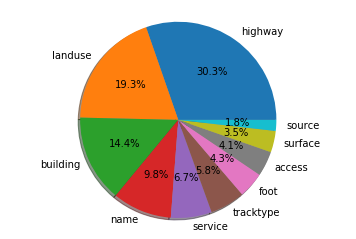

In [4]:
x_val = [x[0] for x in myuser_way_keys()]
y_val = [x[1] for x in myuser_way_keys()]

plt.pie(y_val, labels=x_val, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.show()

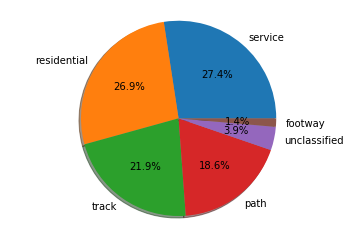

In [5]:
x_val = [x[0] for x in myuser_highway()]
y_val = [x[1] for x in myuser_highway()]

plt.pie(y_val, labels=x_val, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.show()

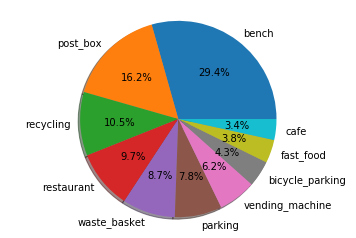

In [6]:
x_val = [x[0] for x in common_ammenities()]
y_val = [x[1] for x in common_ammenities()]

plt.pie(y_val, labels=x_val, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.show()

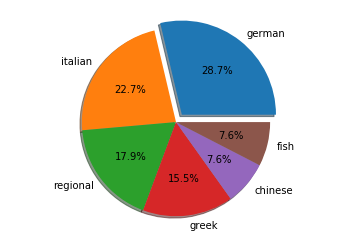

In [7]:
explode = (0.1, 0, 0, 0,0,0)  # explode 1st slice
 
x_val = [x[0] for x in popular_cuisines()]
y_val = [x[1] for x in popular_cuisines()]

plt.pie(y_val, labels=x_val, explode=explode,autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.show()

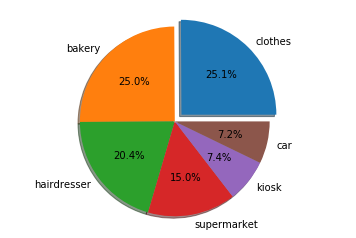

In [8]:
explode = (0.1, 0, 0, 0,0,0)  # explode 1st slice
 
x_val = [x[0] for x in popular_shops()]
y_val = [x[1] for x in popular_shops()]

plt.pie(y_val, labels=x_val, explode=explode,autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.show()